<a href="https://colab.research.google.com/github/kipsangchepesa/Python-Roulette/blob/master/The_Focus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries 

In [ ]:
import pandas as pd
import numpy as np#For working with numbers 
from scipy import stats#for statistic
import seaborn as sns# for visualization 
import matplotlib.pyplot as plt#for plotting 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder#for encoding 
from sklearn.preprocessing import StandardScaler#for scaling 
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc
from xgboost import XGBClassifier

plt.style.use("Solarize_Light2")

# from google.colab import data_table
# data_table.enable_dataframe_formatter()

import warnings
warnings.filterwarnings("ignore")#to remove warning on deprecated lines of codes 

Loading the dataset


In [ ]:
df=pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


##Exploring the dataset

In [ ]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
# Cheking the shape of the dataset
print('The dataset has ',df.shape[0],' rows and ',df.shape[1],' Columns.')


The dataset has  70692  rows and  22  Columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df.sample(20)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
32926,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
2954,0.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
22275,0.0,0.0,0.0,0.0,22.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,20.0,0.0,0.0,1.0,4.0,4.0,3.0
4042,0.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,8.0,7.0,0.0,0.0,12.0,5.0,6.0
33619,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,7.0
65787,1.0,1.0,1.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,5.0,30.0,1.0,0.0,9.0,5.0,6.0
3719,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,5.0,8.0
36567,1.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,4.0,5.0
20410,0.0,1.0,0.0,1.0,22.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,5.0,0.0,0.0,10.0,6.0,8.0
15692,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,5.0


In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df['NoDocbcCost'].unique()

array([0., 1.])

In [ ]:
#Unique values in each attribute
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
#Previewing simple statistics in our dataset
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


##Cleaning Dataset

####Checking for null values 

In [ ]:
#checking for null value
df.isna().sum() 

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no null values 

In [ ]:
# Checking for the data types
print('It also has the following datatypes: ', df.dtypes)


It also has the following datatypes:  Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [ ]:
# converting the columns values from float to integer
df = df.astype(int)
df.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

###Checking for outliers

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<function matplotlib.pyplot.show>

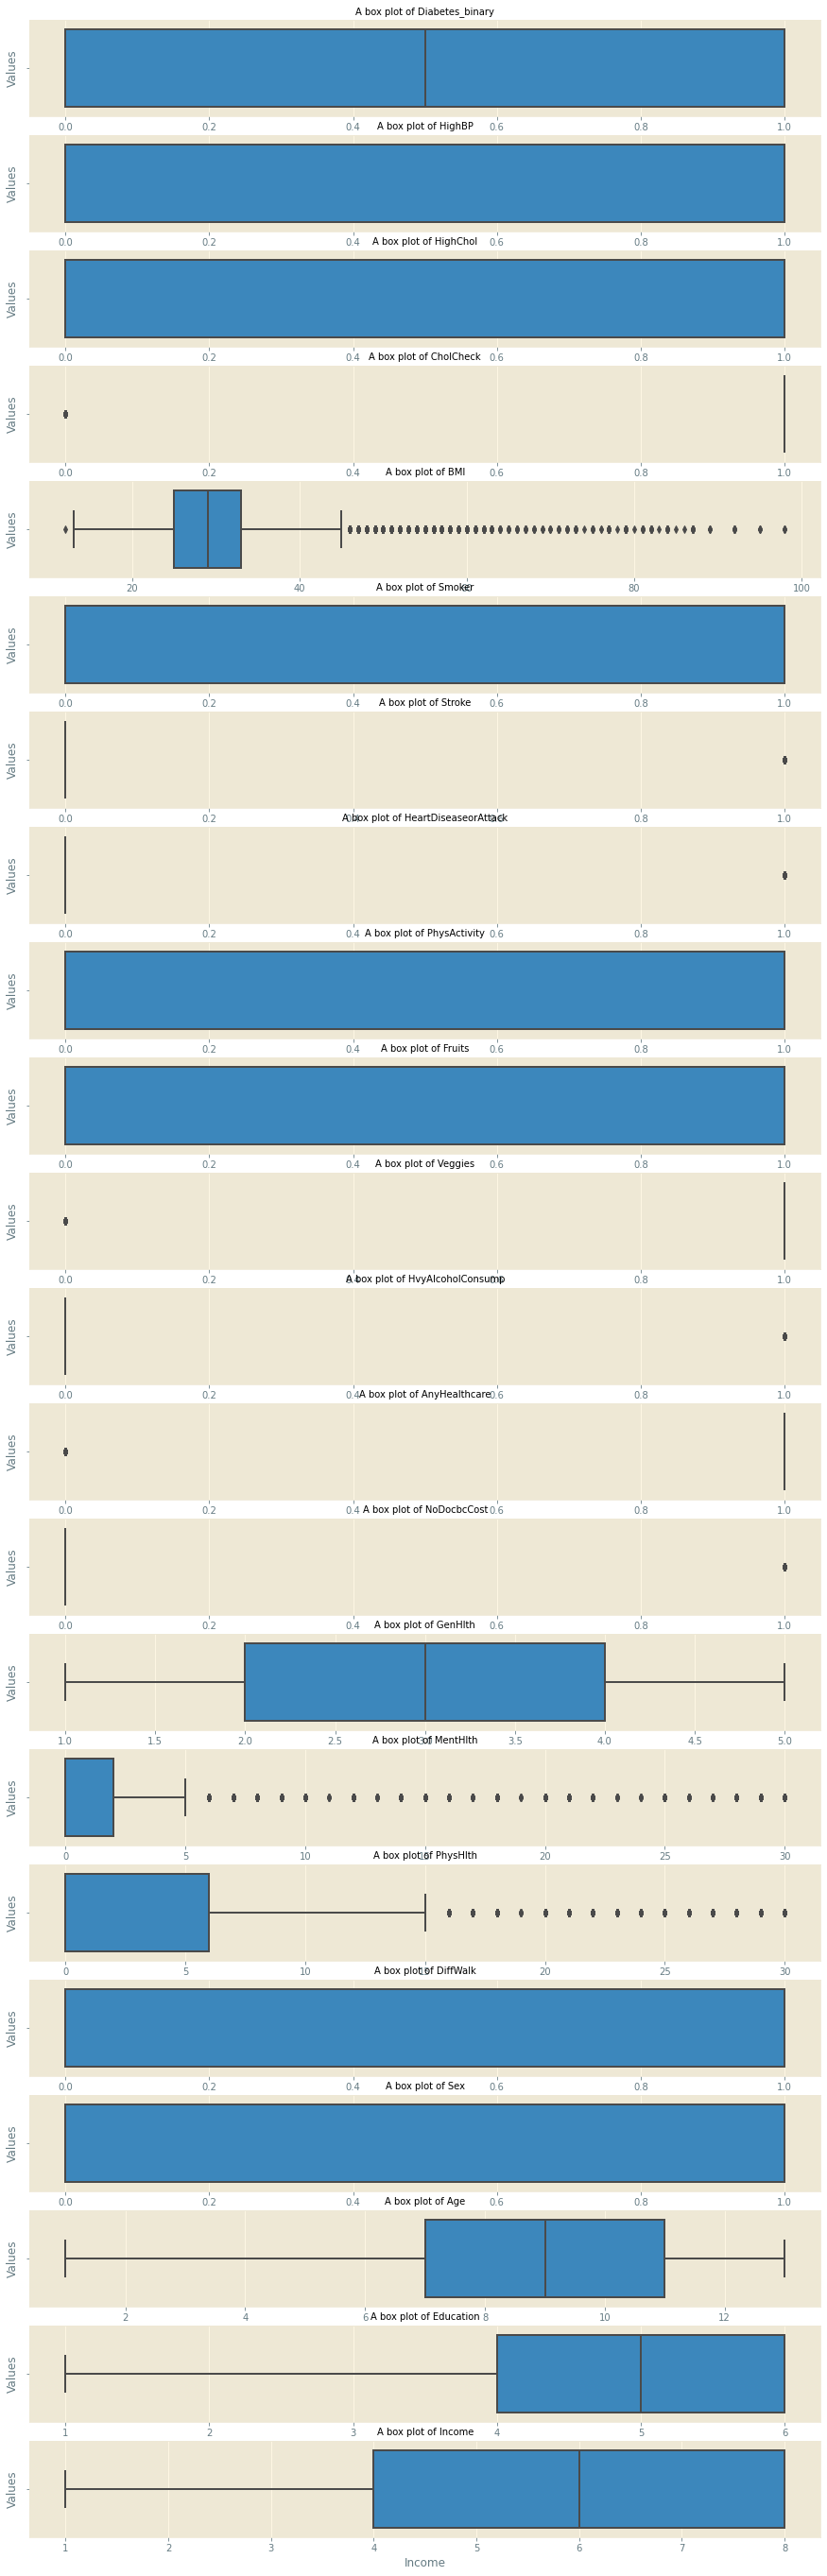

In [ ]:
# Checking for outliers
cols=['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
fig,ax=plt.subplots(len(cols),figsize=(15,49))
for i,col_vals in enumerate(cols):
  sns.boxplot(x=df[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+format(col_vals),fontsize=10)
  ax[i].set_ylabel('Values')
plt.show

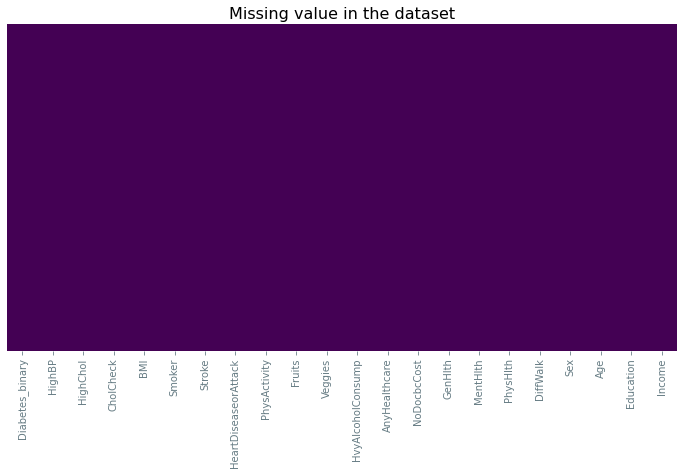

In [ ]:
# Checking for missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');
# There are no missing values in the dataset

##Exploratory Data Analysis

####a). Univariate analysis

In [ ]:
# A brief description of the dataset 
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Checking skewness and kurtosis
dist=pd.DataFrame({'Skewness':df.skew(),'Kurtosis':df.kurt()},index=df.columns)
dist

,Skewness,Kurtosis
Diabetes_binary,0.000000,-2.000057
HighBP,-0.255908,-1.934566
HighChol,-0.102950,-1.989457
CholCheck,-6.119271,35.446486
BMI,1.719180,7.164081
Smoker,0.099031,-1.990249
Stroke,3.626499,11.151808
HeartDiseaseorAttack,1.984703,1.939102
PhysActivity,-0.888732,-1.210190
Fruits,-0.458804,-1.789549


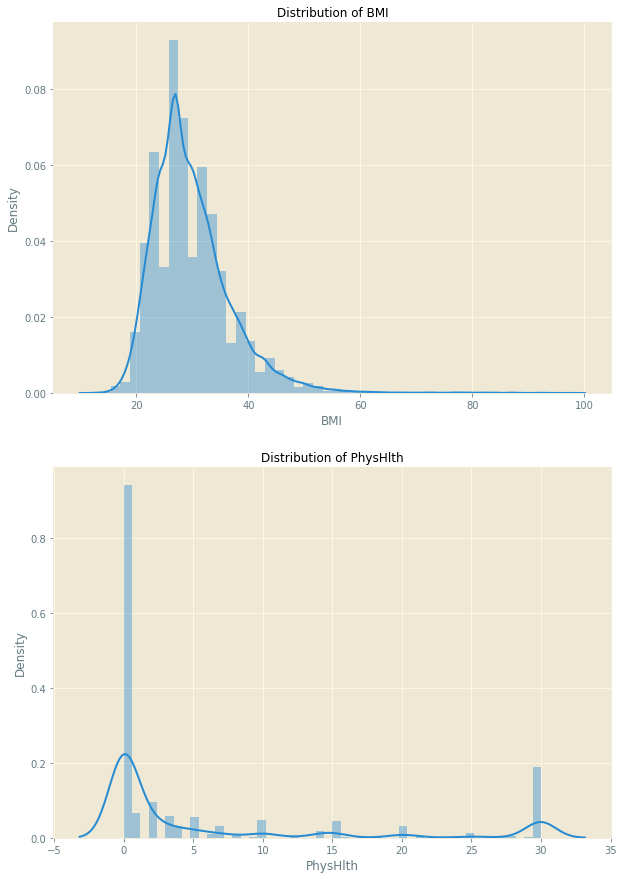

In [ ]:
# Getting the distribution of continous variables.
my_cols=['BMI','PhysHlth']
fig,ax=plt.subplots(len(my_cols),figsize=(10,15))
for i,cols in enumerate(my_cols):
  sns.distplot(df[cols],ax=ax[i],kde=True)
  ax[i].set_title('Distribution of '+format(cols),fontsize=12)

	
BMI is slightly positively skewed and it follows a normal distribution since we have many respondents with normal weight as expected in real life situation.

-The distribution of physical health is concentrated around zero meaning many respondents were physically healthy and its also positively skewed with a large number of respondents having there physical health not good through out the month that is for the last 30 days.

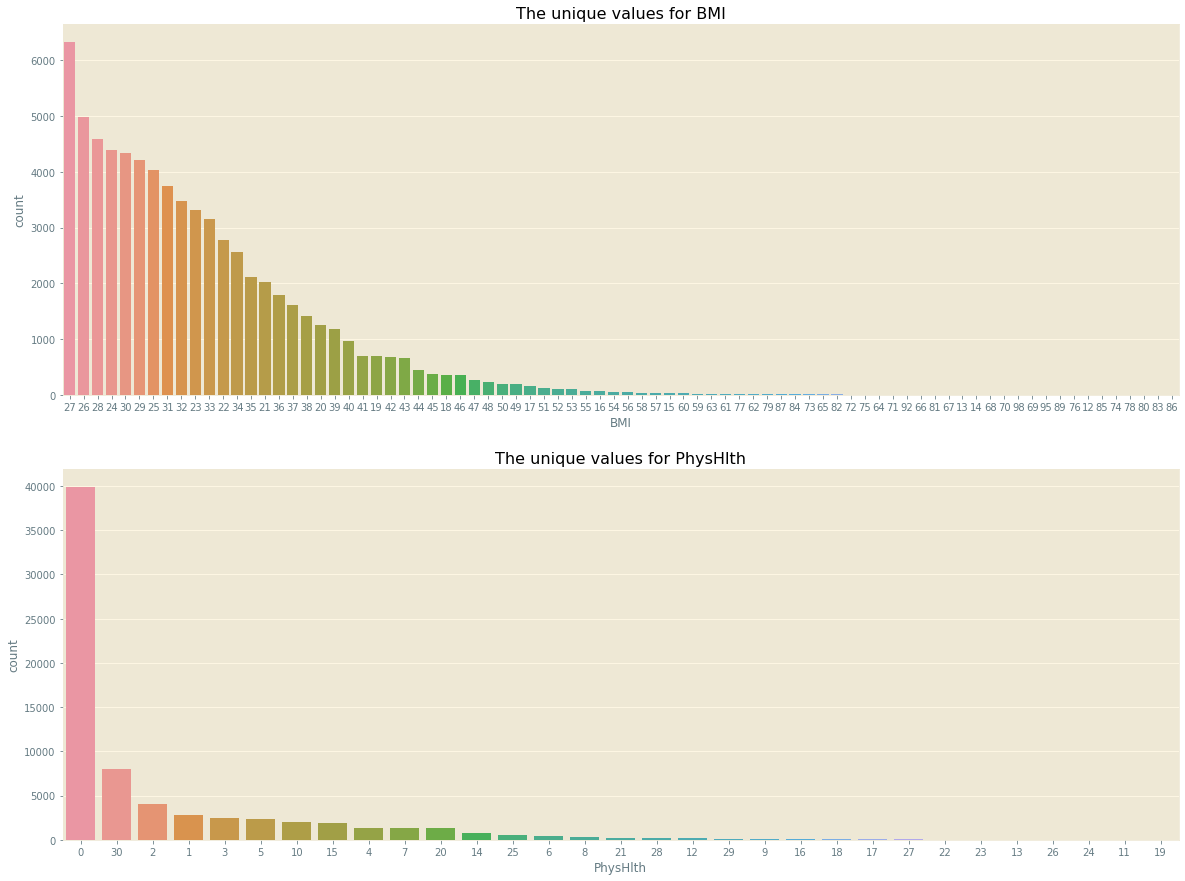

In [ ]:
# Using 
ordinal=['BMI','PhysHlth']
fig,ax=plt.subplots(len(ordinal),figsize=(20,15))
for i,cols in enumerate(ordinal):
  sns.countplot(df[cols],order=df[cols].value_counts().index,ax=ax[i])
  ax[i].set_title('The unique values for '+format(cols))

##b.) Bivariate Analysis

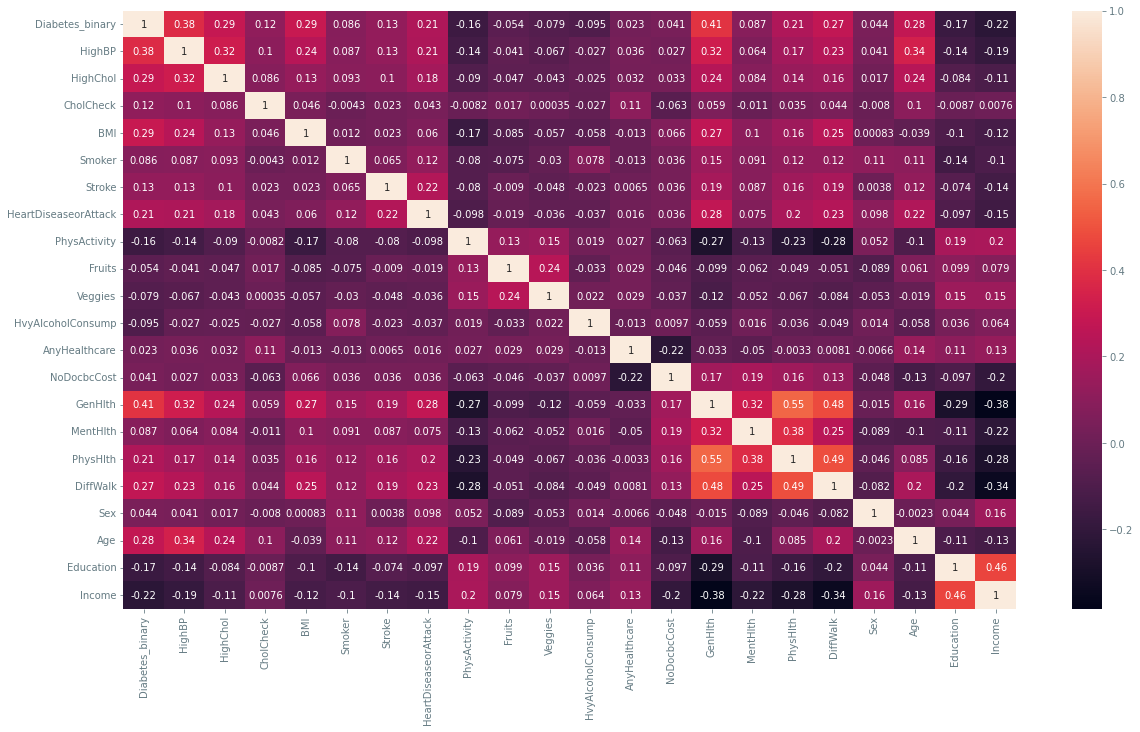

In [ ]:
# Observing the relationship within the dataset.
corr=df.corr()
plt.figure(figsize=(20,11))
sns.heatmap(corr,  annot=True)
sns.color_palette("mako", as_cmap=True)
plt.show()

In [ ]:
def barplots(data,col1,col2):
  plt.figure(figsize=(10,6))
  sns.barplot(x=col1, y=col2,data=data, palette='Oranges_r')
  plt.title('The relationship between '+str(col1)+' and '+str(col2),fontsize=15)
  plt.show()

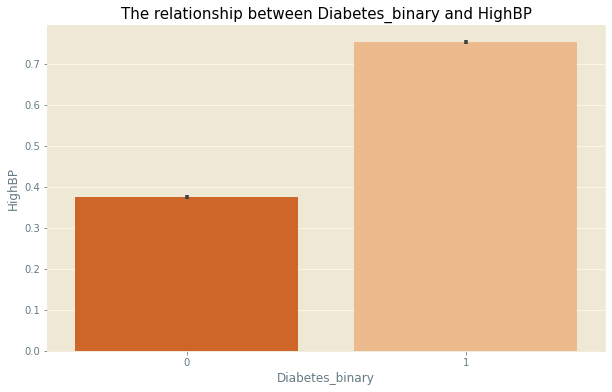

In [ ]:
barplots(df,'Diabetes_binary', 'HighBP')

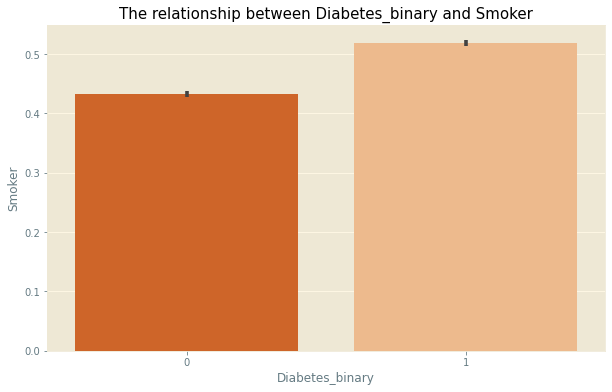

In [ ]:
barplots(df,'Diabetes_binary','Smoker')

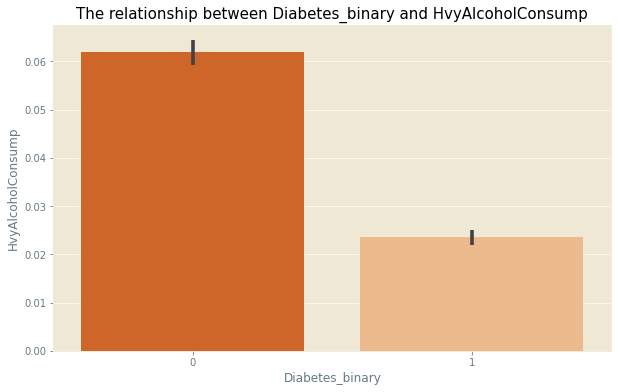

In [ ]:
barplots(df,'Diabetes_binary','HvyAlcoholConsump' )

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')